In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import skew

In [7]:
data = pd.read_csv('clean_data_after_eda.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [9]:
data.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_p

In [10]:
date= ["date_activ", "date_end", "date_modif_prod", "date_renewal"]
for i in date:
    data[i] = pd.to_datetime(data[i])

In [11]:
# price change
data['price_peak_trend'] = data['var_6m_price_peak_var'] - data['var_year_price_peak_var']
data['price_offpeak_trend'] = data['var_6m_price_off_peak_var'] - data['var_year_price_off_peak_var']

# Consumption Change
data['consumption_change'] = data['cons_last_month'] - (data['cons_12m'] / 12)

# Margin Ratio Feature
data['margin_ratio'] = data['net_margin'] / (data['margin_gross_pow_ele'] + 1)

In [12]:
data['num_years_antig'].value_counts()

num_years_antig
6     4769
4     3982
3     2433
5     2317
7      509
11     185
12     110
8      103
9       92
10      81
13      13
2       11
1        1
Name: count, dtype: int64

In [13]:
def classify_tenure(years):
    if years <= 3:
        return 'New'
    elif years <= 6:
        return 'Mid'
    else:
        return 'Long'
    
data['tenure_category'] = data['num_years_antig'].apply(classify_tenure)

In [14]:
data['tenure_category'].value_counts()

tenure_category
Mid     11068
New      2445
Long     1093
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import OneHotEncoder
coder = OneHotEncoder(sparse_output=False,drop = None)
tenure_encoded = coder.fit_transform(data[['tenure_category']])
tenure_columns = coder.get_feature_names_out(['tenure_category'])
data_encoded = pd.DataFrame(tenure_encoded, columns =tenure_columns)

data = pd.concat([data,data_encoded],axis = 1).drop(['tenure_category'],axis =1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

From EDA we got that [cons_12m, cons_gas_12m, cons_last_month,'forecast_cons_12m', 'forecast_cons_year','forecast_meter_rent_12m', 'forecast_price_energy_off_peak','forecast_price_energy_peak', 'forecast_price_pow_off_peak']  are highly roght skewed so we apply log transform. 

In [17]:
data["cons_12m"] = np.log10(data["cons_12m"] + 1)
data["cons_gas_12m"] = np.log10(data["cons_gas_12m"] + 1)
data["cons_last_month"] = np.log10(data["cons_last_month"] + 1)
data["forecast_cons_12m"] = np.log10(data["forecast_cons_12m"] + 1)
data["forecast_cons_year"] = np.log10(data["forecast_cons_year"] + 1)
data["forecast_meter_rent_12m"] = np.log10(data["forecast_meter_rent_12m"] + 1)
data["forecast_price_energy_off_peak"] = np.log10(data["forecast_price_energy_off_peak"] + 1)
data["forecast_price_energy_peak"] = np.log10(data["forecast_price_energy_peak"] + 1)
data["forecast_price_pow_off_peak"] = np.log10(data["forecast_price_pow_off_peak"] + 1)

In [18]:
col =['cons_12m', 'cons_gas_12m', 'cons_last_month','forecast_cons_12m', 'forecast_cons_year','forecast_meter_rent_12m', 'forecast_price_energy_off_peak','forecast_price_energy_peak', 'forecast_price_pow_off_peak']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6768\1025691561.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((data[col[i]].dropna()),ax = axs[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6768\1025691561.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((data[col[i]].dropna()),ax = axs[i])


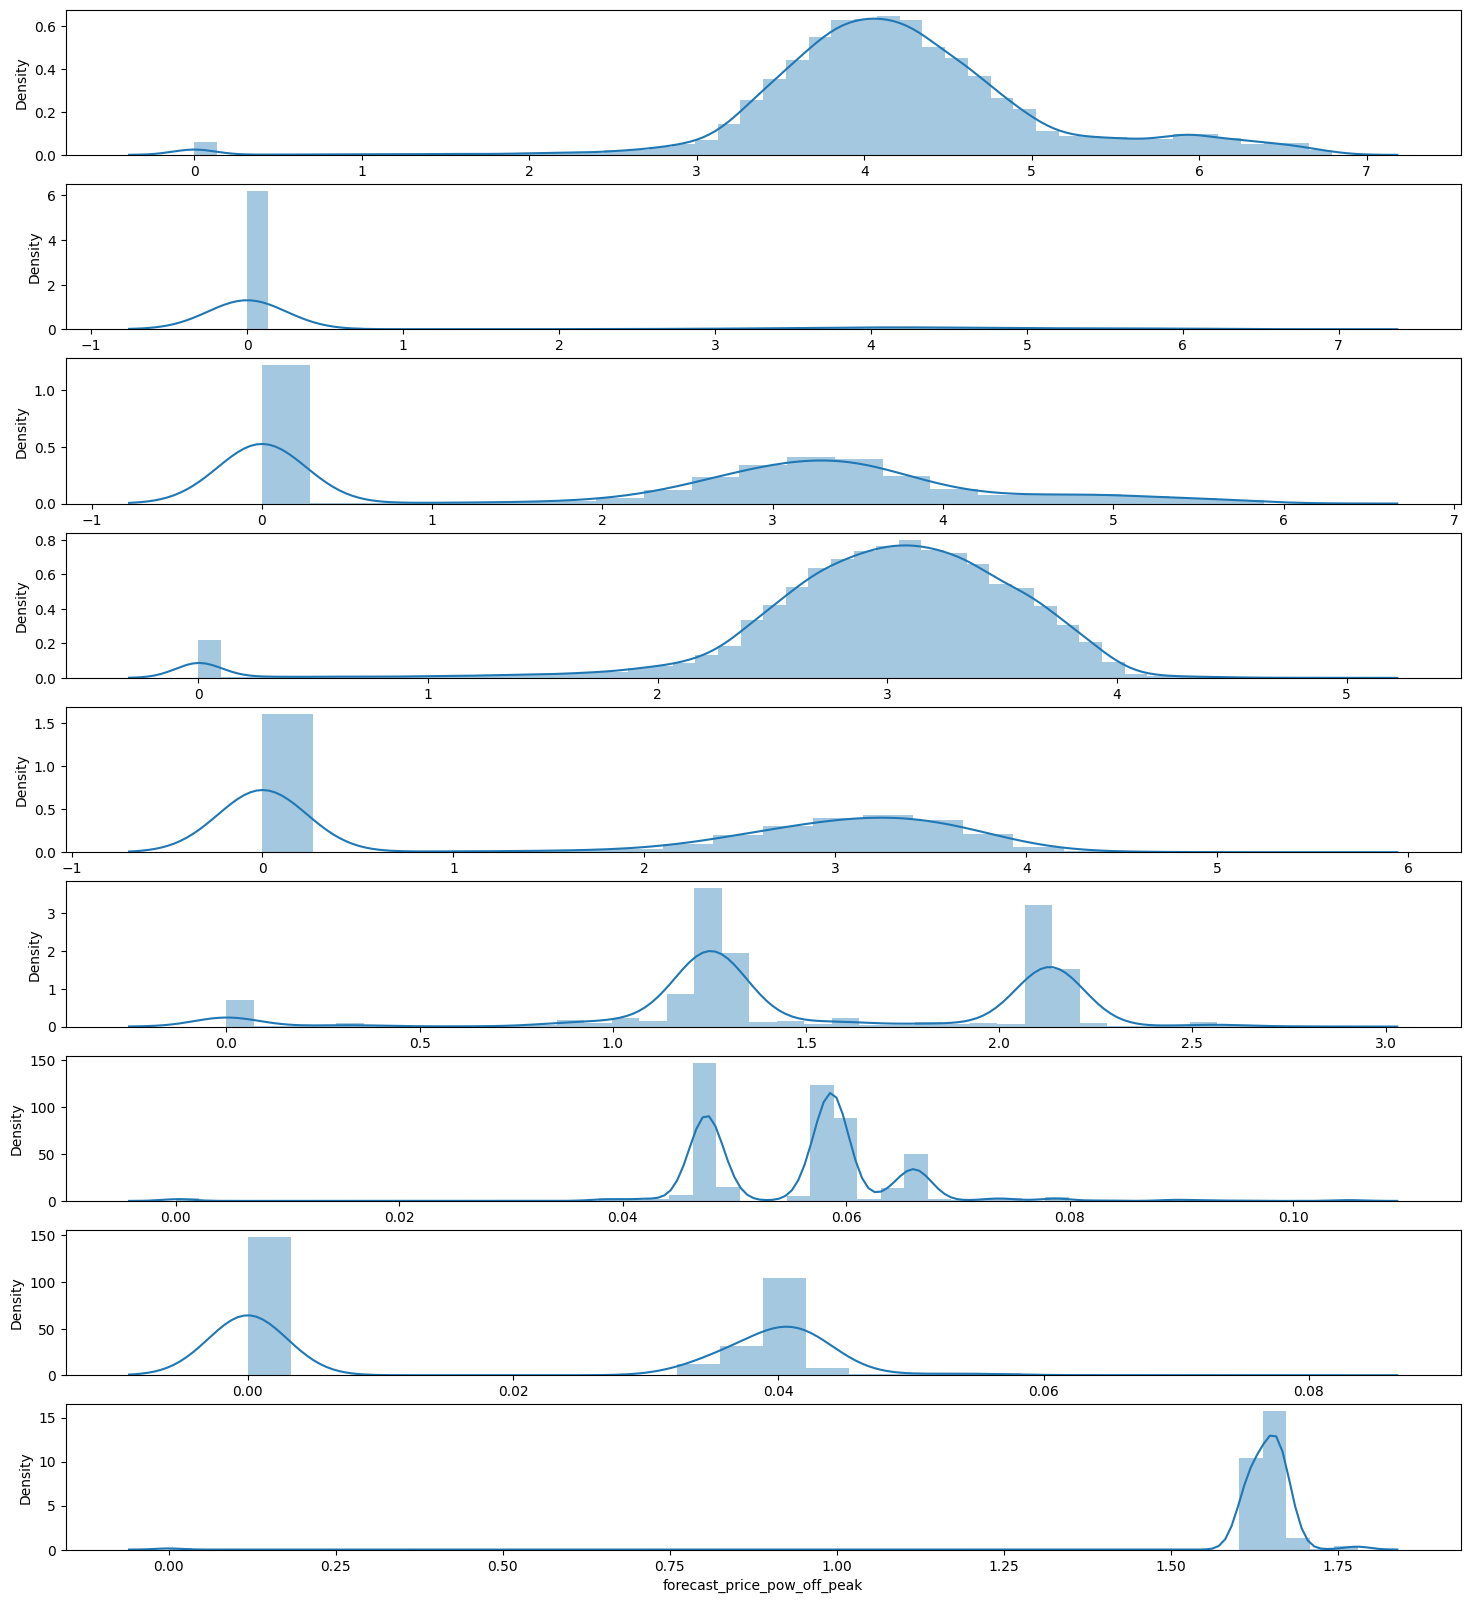

In [19]:
fig, axs = plt.subplots(nrows=9, figsize=(18, 20))
# Plot histograms
for i in range(9):
    sns.distplot((data[col[i]].dropna()),ax = axs[i])
plt.show()

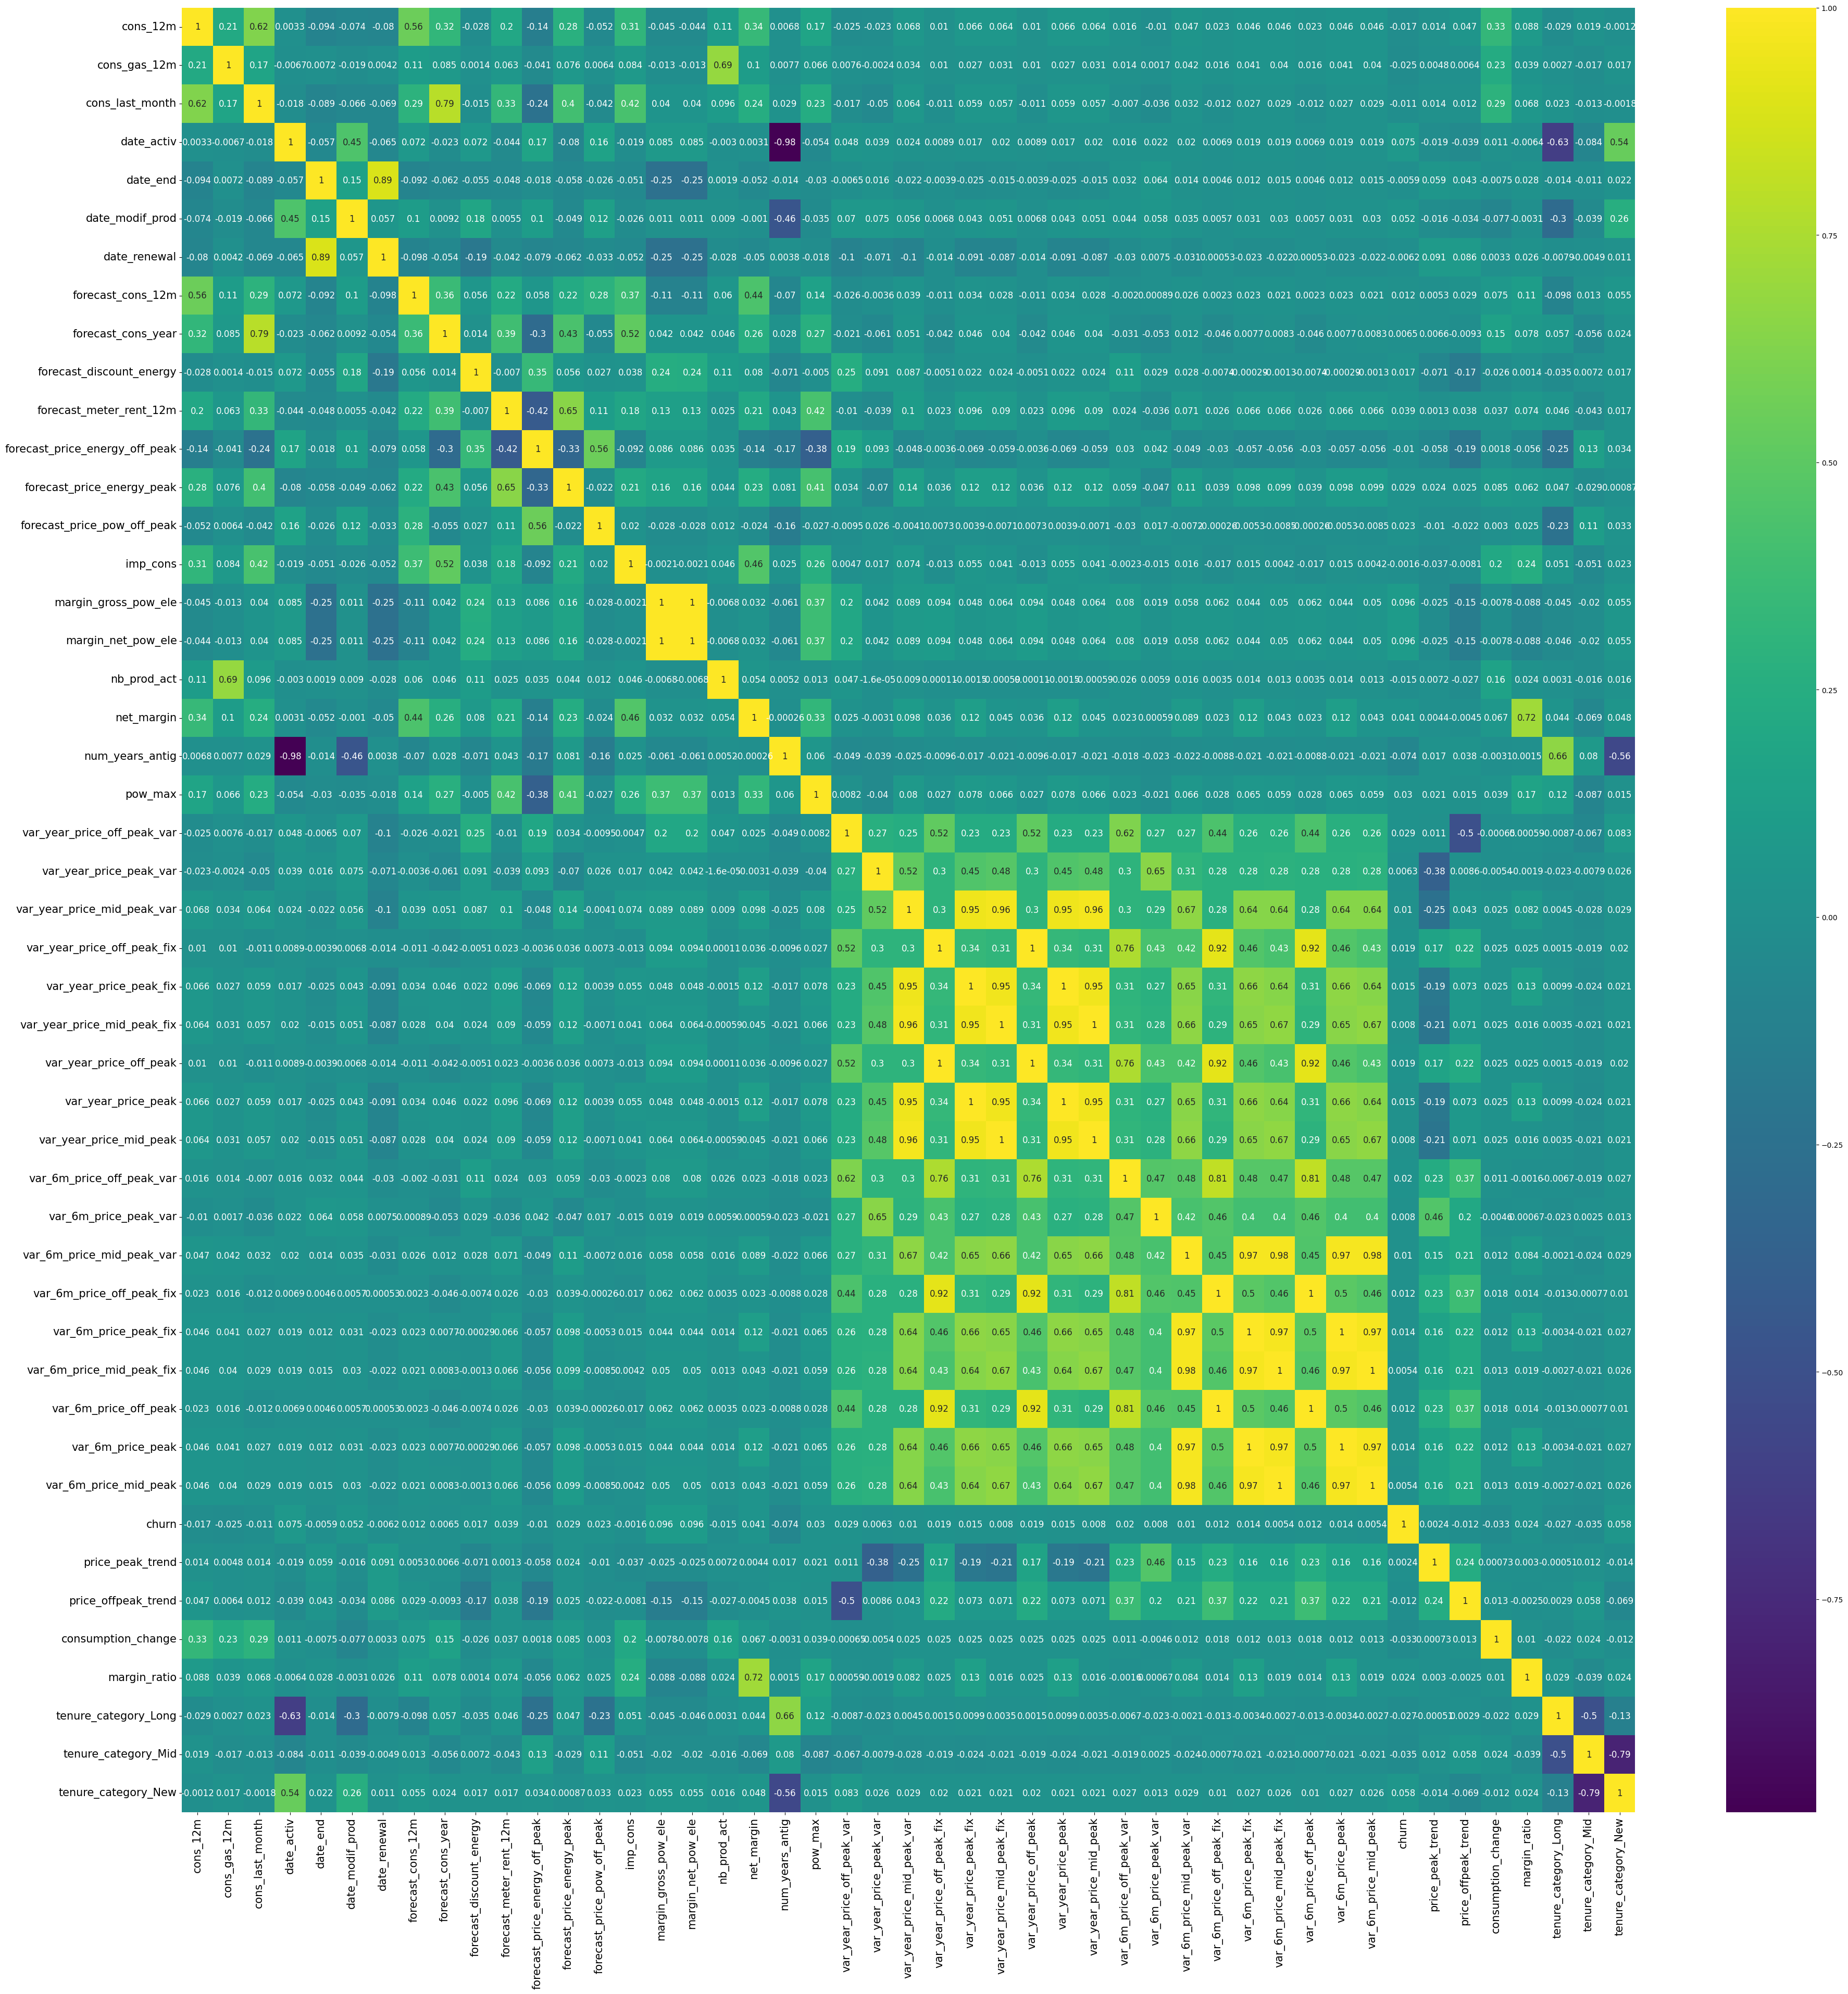

In [20]:
plt.figure(figsize=(45,45))
sns.heatmap(data.drop(['id','has_gas','channel_sales','origin_up'],axis =1).corr(),annot = True,cmap = 'viridis', annot_kws={'size': 12})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


Now, from here we can remove  highly correlated features.

In [21]:
# 7. Correlation Map: Identify highly correlated features
correlation_matrix = data.corr(numeric_only=True)

# Get pairs with correlation > 0.9 (excluding self-correlation)
high_corr_pairs = (
    correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
high_corr_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'].abs() > 0.95]

print("Highly correlated feature pairs (|correlation| > 0.95):")
print(high_corr_pairs)

Highly correlated feature pairs (|correlation| > 0.95):
                       Feature_1                    Feature_2  Correlation
407         margin_gross_pow_ele           margin_net_pow_ele     0.999914
629  var_year_price_mid_peak_var  var_year_price_mid_peak_fix     0.961481
632  var_year_price_mid_peak_var      var_year_price_mid_peak     0.961483
652  var_year_price_off_peak_fix      var_year_price_off_peak     1.000000
672      var_year_price_peak_fix  var_year_price_mid_peak_fix     0.954353
674      var_year_price_peak_fix          var_year_price_peak     1.000000
675      var_year_price_peak_fix      var_year_price_mid_peak     0.954354
694  var_year_price_mid_peak_fix          var_year_price_peak     0.954354
695  var_year_price_mid_peak_fix      var_year_price_mid_peak     1.000000
732          var_year_price_peak      var_year_price_mid_peak     0.954355
799    var_6m_price_mid_peak_var        var_6m_price_peak_fix     0.970093
800    var_6m_price_mid_peak_var    var_6m_p

In [22]:
gas = {'t':1, 'f': 0}
data['gas_status'] = data['has_gas'].map(gas)
data.drop(['has_gas'],axis = 1)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak,churn,price_peak_trend,price_offpeak_trend,consumption_change,margin_ratio,tenure_category_Long,tenure_category_Mid,tenure_category_New,gas_status
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.000000,4.739944,0.000000,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.000000,...,4.423670e+01,1,1.473233e-05,0.000070,0.000000,25.680408,0.0,0.0,1.0,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,3.668479,0.000000,0.000000,2009-08-21,2016-08-30,2009-08-21,2015-08-31,2.280920,...,0.000000e+00,0,6.089453e-04,-0.000002,-388.333333,1.086881,0.0,1.0,0.0,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,2.736397,0.000000,0.000000,2010-04-16,2016-04-16,2010-04-16,2015-04-17,1.689841,...,0.000000e+00,0,-1.613496e-07,-0.000002,-45.333333,0.222973,0.0,1.0,0.0,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,3.200029,0.000000,0.000000,2010-03-30,2016-03-30,2010-03-30,2015-03-31,2.382089,...,0.000000e+00,0,0.000000e+00,-0.000002,-132.000000,0.815503,0.0,1.0,0.0,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,3.646011,0.000000,2.721811,2010-01-13,2016-03-07,2010-01-13,2015-03-09,2.650065,...,4.860000e-10,0,-6.557213e-07,-0.000004,157.250000,1.045088,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,4.508812,4.680707,0.000000,2012-05-24,2016-05-08,2015-05-08,2014-05-26,3.667360,...,0.000000e+00,0,0.000000e+00,-0.000012,-2689.166667,13.219183,0.0,1.0,0.0,1
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,3.858778,0.000000,2.260071,2012-08-27,2016-08-27,2012-08-27,2015-08-28,2.801191,...,2.987132e-04,1,-1.246940e-06,-0.000005,-420.916667,90.340000,0.0,0.0,1.0,0
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,3.265996,0.000000,2.255273,2012-02-08,2016-02-07,2012-02-08,2015-02-09,2.281919,...,4.860000e-10,1,-1.060535e-06,-0.000005,25.333333,0.499021,0.0,1.0,0.0,0
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,2.120574,0.000000,0.000000,2012-08-30,2016-08-30,2012-08-30,2015-08-31,1.308351,...,0.000000e+00,0,6.089453e-04,-0.000002,-10.916667,0.068182,0.0,0.0,1.0,0


In [23]:
data.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_p

## Model 1 - use logistic

In [24]:
X = data.drop(['id', 'channel_sales','date_activ', 'date_end', 'date_modif_prod', 'date_renewal','origin_up','has_gas','churn'],axis =1)
y= data['churn']


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3,random_state =42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
model1 =LogisticRegression(penalty = 'l2')
model1.fit(X_train_scaled, y_train)
y1_pred = model1.predict(X_test_scaled)

In [28]:
tn, fp, fn, tp = confusion_matrix(y_test, y1_pred).ravel()
print(f'True negatives:{tn}')
print(f'False positives:{fp}')
print(f'False negatives:{fn}')
print(f'True positives:{tp}')

True negatives:3937
False positives:5
False negatives:438
True positives:2


<Axes: >

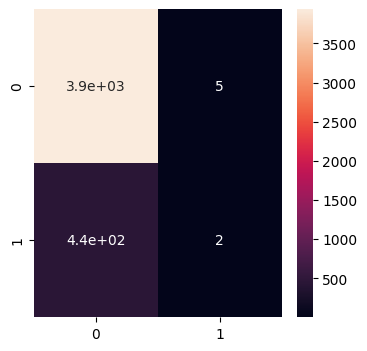

In [29]:
plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix(y_test, y1_pred),annot = True, )

In [30]:
print(f'accuracy_score: {accuracy_score(y_test,y1_pred)}')
print(f'precision: {precision_score(y_test,y1_pred)}')
print(f'recall: {recall_score(y_test,y1_pred)}')

accuracy_score: 0.8989046097672295
precision: 0.2857142857142857
recall: 0.004545454545454545


Eventhough the model has good accuracy, it has a vey low recall. Means the consumers who have churned, are falsely categorized into not churn.

## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier


In [32]:
model_RF = RandomForestClassifier(n_estimators = 1000).fit(X_train, (y_train))
y_pred_RF = model_RF.predict(X_test)

In [35]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_RF).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 14
False positives: 2
True negatives: 3940
False negatives: 426



In [41]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3942
           1       0.88      0.03      0.06       440

    accuracy                           0.90      4382
   macro avg       0.89      0.52      0.50      4382
weighted avg       0.90      0.90      0.86      4382



In [36]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model_RF.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

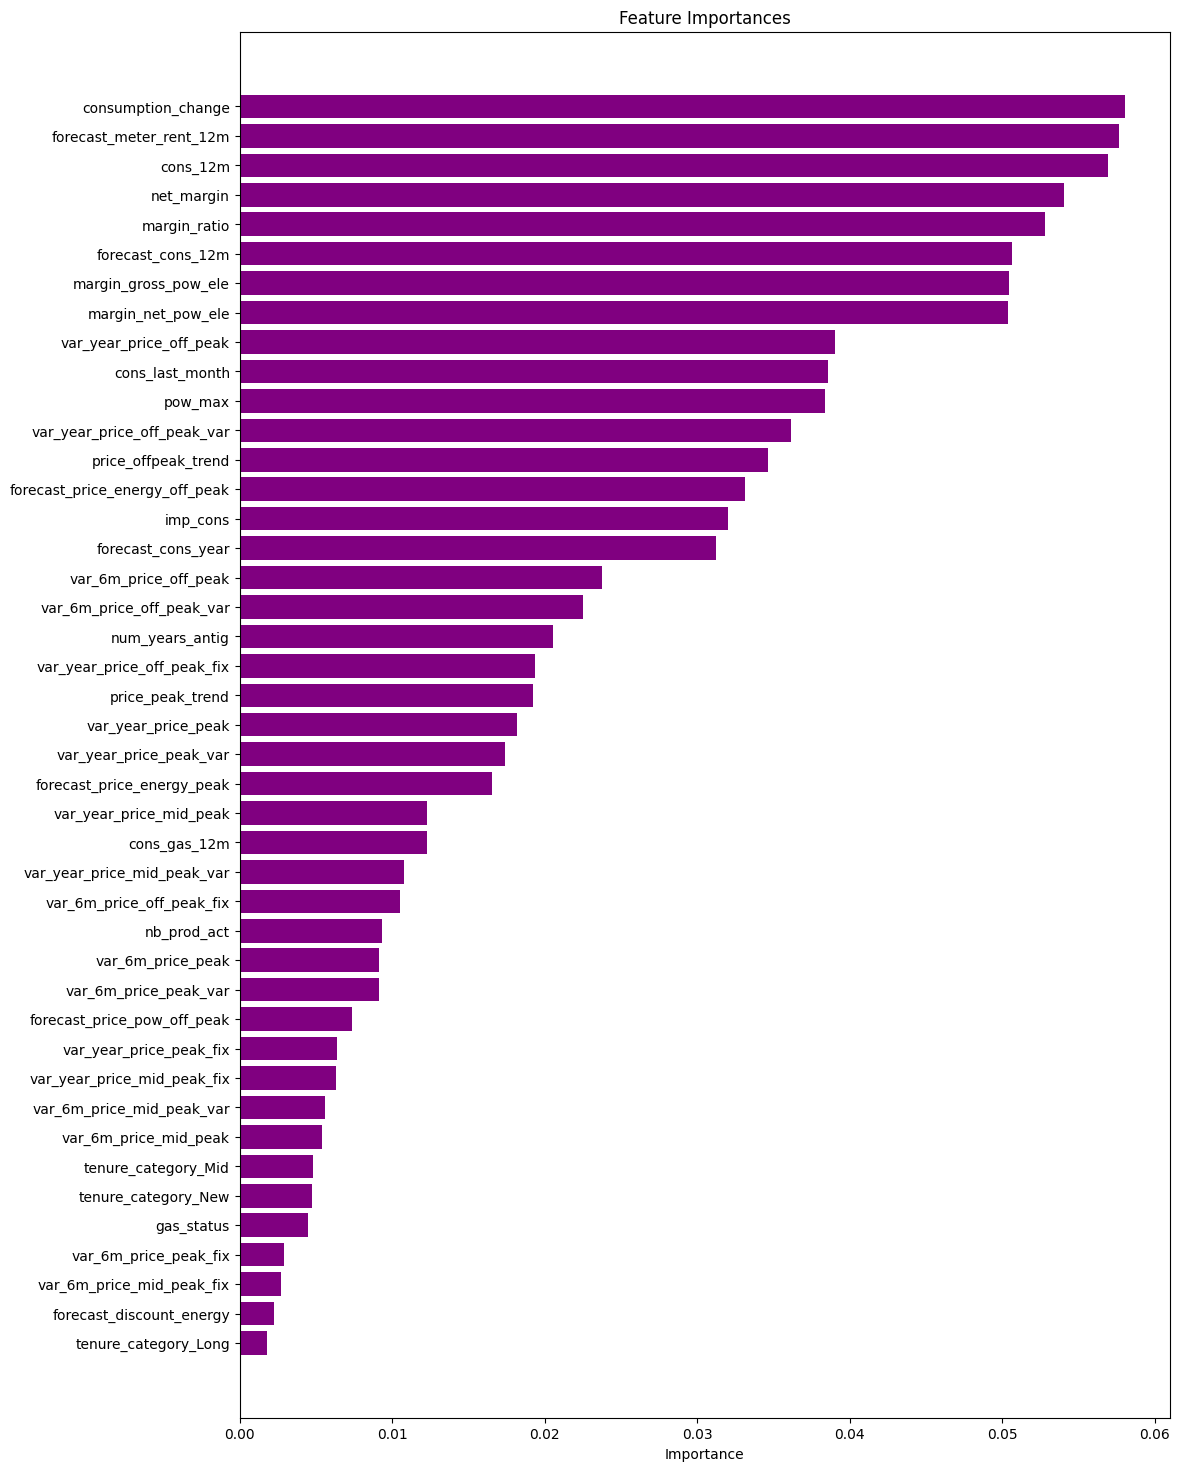

In [37]:
plt.figure(figsize=(12, 18))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='purple', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

##### I've added feature engineering for:

- Tenure classification (New, Mid, Long)

- Price trend analysis (6-month vs 1-year fluctuations)

- Consumption change (last month vs. yearly avg)

- Margin ratio (net vs. gross margin)


- Consumption-Related Features
  - cons_12m, cons_gas_12m, cons_last_month
  - Lower or inconsistent consumption patterns might indicate customers seeking better pricing elsewhere.
- Contract & Date-Based Features
  - date_activ, date_end, date_modif_prod, date_renewal
  - Customers near the end of their contract might be more likely to churn.
- Financial Features
  - forecast_price_energy_off_peak, forecast_price_energy_peak, forecast_price_pow_off_peak
  - margin_gross_pow_ele, margin_net_pow_ele, net_margin
  - if a customer's margin is decreasing or the forecasted price is increasing, they may seek alternatives.
- var_year_price_off_peak_var, var_year_price_peak_var, var_year_price_mid_peak_var
  - var_6m_price_peak_var, var_6m_price_off_peak_var, var_6m_price_mid_peak_var
  - High price variability may cause dissatisfaction and drive customers away
- num_years_antig (customer tenure)
  - Newer customers are more likely to churn compared to long-term customers.


#### observations
From this chart, we can observe the following points: the following 4 features are the top features important in the predictive model:

- forecast meter rent 12 month
- Consumption over 12 months
- Net margin also plays an important role in the predictive model.
- Forecast of Consumption in the next 12 months

Our price sensitivity features are scattered around but are not the main driver for a customer churning.

The model underperforms True positives, False positives and False Negatives.

- Looking at the true negatives, we have 3973 out of 3989. This is great!

- Looking at the false negatives, 395 is too high.

- Looking at false positives, we can see there are only 2, this is bad.

- With the true positives, we correctly identify 12 of those 393, which is very poor.

- Looking at the accuracy score, this is very misleading, looking at the precision score and recall score 29%, precision score shows us a score of 85% which is not bad, but could be improved. However, the recall shows us that the classifier has a very poor ability to identify positive samples. This would be the main concern for improving this model!



The Classification Report contains Overall Precision score(Performance of the Classification Model), Overall Accuracy of the model, Recall Score(predicts the actual values), and f-1 Score( Which is a Combination of Precision and Recall Score). The Classification Report helped us find out the accuracy of the model used, and the recall score to correctly predict how many will churn. Confusion Matrix gave us the scores of correctly predicted scores of customers who will churn, vs. the score of incorrectly predicted score of customers who will not churn. AUC and ROC Score a single summary metric of overall model performance, where higher values are better.

ROC curve gives you insights into the model's performance at various threshold levels, helped me choose a threshold that meets your specific trade-off between false positives and true positives.

Both metrics are valuable for evaluating the performance of binary classification models, and they complement each other in providing a comprehensive assessment of a model's discriminatory power.

Feature Importance gave us the variables which might be the top contributors to churn. And also gave us the reassurance that price is infact not the main concern or reason for churn. It is other variables.

 the model performance is just satisfactory. as the AUC Score suggests 60%. Unless we improve on the score of tpr, fpr and fn score, it would not be possible to deploy this model. Also, parameter tuning, and checking other models and their parameter tuning might just help in figuring out which customers might churn or not.